# Feature Engineering and Modelling

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

In [8]:
model = RandomForestClassifier(criterion = 'gini', n_estimators = 100) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier()

In [25]:
# View all the parameters used for the model
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [10]:
# Generating predictions
y_predictions = model.predict(X_test)
y_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Calculating performance metrics
model.score(X_test, y_test)

0.9044359255202629

Text(47.25, 0.5, 'True label')

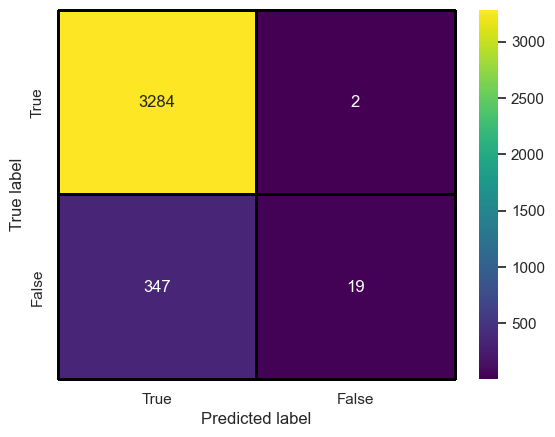

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictions) # Creating the confusion matrix
cm_df = pd.DataFrame(cm) # Converting the confusion matrix from array to dataframe
cm_df = cm_df.rename(columns = {0: 'True', 1:'False'}, index = {0: 'True', 1:'False'}) # Renaming columns and indices

sns.heatmap(cm_df, cmap = 'viridis', annot = True, fmt='d', linewidths=1, linecolor='black', clip_on=False)
# fmt='d' is to format the labels as integers since those are formatted into scientific notation by default
# linewidths and linecolor parameters are used for adding outlines to each cell of the heatmap
# clip_on is set to False to ensure the outer borders are the same thickness as the inner borders
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [24]:
# Getting the number of customers that have churned
# 0 = customer has not churned
# 1 = customer has churned
pd.DataFrame(y_predictions).value_counts()

0    3631
1      21
Name: count, dtype: int64

In [18]:
tp = cm_df.iloc[0,0]
fp = cm_df.iloc[0,1]
tn = cm_df.iloc[1,0]
fn = cm_df.iloc[1,1]
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

 True Positives: 3284
 False Positives: 2
 True Negatives: 347
 False Negatives: 19


Here we can see that around 10% of the customers have churned, which is a small number of people, but it can still be improved.

<Axes: ylabel='feature'>

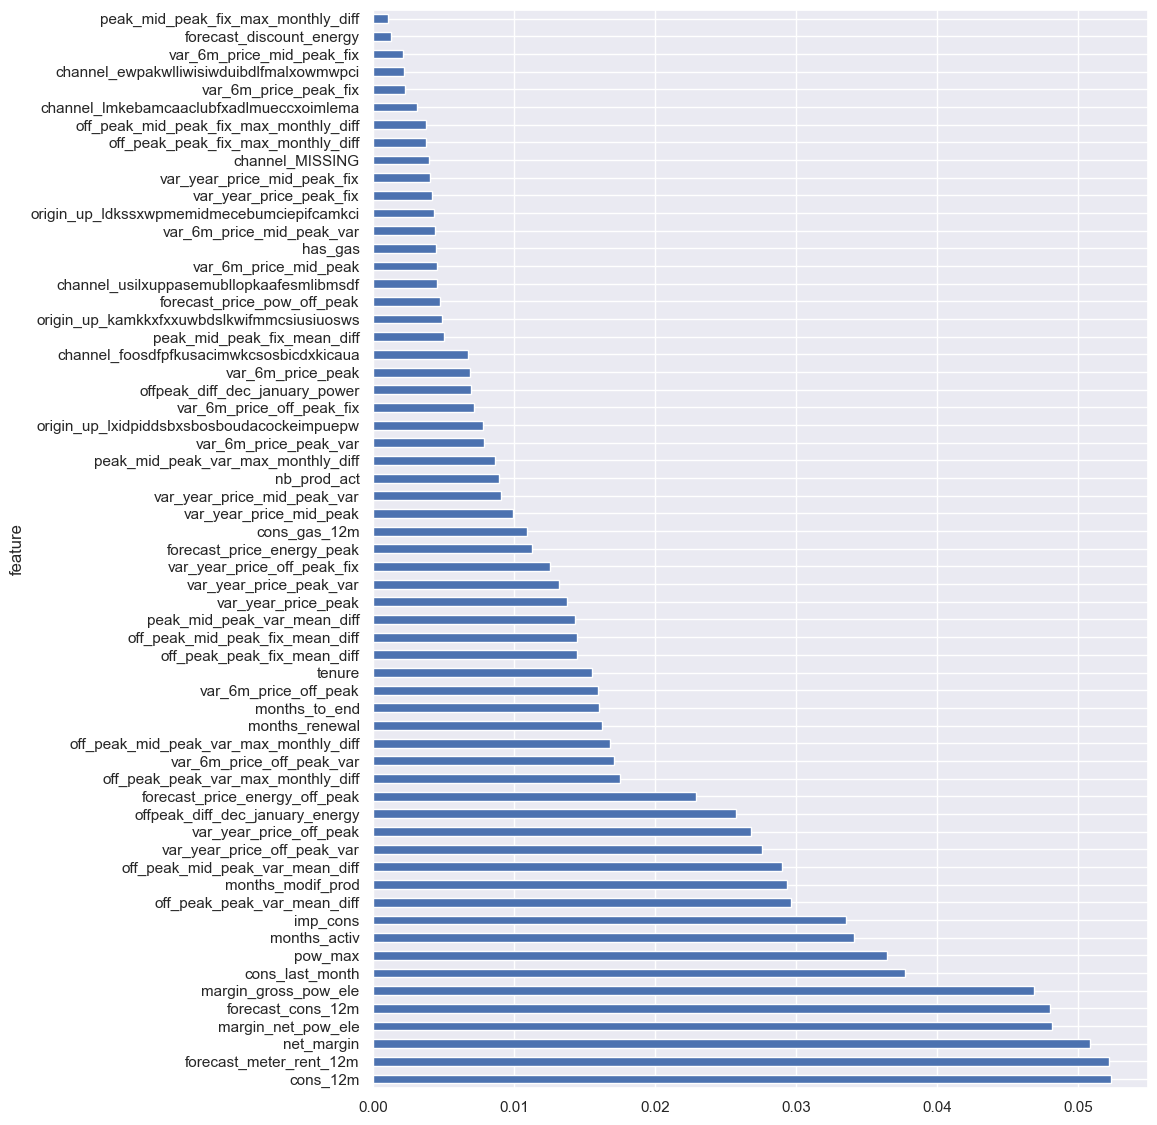

In [19]:
# Creating the Feature Importance Graph
def feature_imp(df,model):
    fi = pd.DataFrame(columns = ['feature', 'importance'])
    fi['feature'] = df.columns
    fi['importance'] = model.feature_importances_
    return fi.sort_values(by = 'importance', ascending = False)
feature_imp(X_train, model).plot('feature', 'importance', 'barh', figsize = (10,14), legend = False)

We can see that our price sensitivity variables are scattered throughout the feature importance chart, which means that price sensitivity, while there are some variables that are near the top of the chart, it is not that significant of a factor for customers to churn. In fact, the features with the highest importance are the consumption and meter rent forecast over 12 months. Those are the main factors that are causing customers to turn away from PowerCo.